# Importing Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [3]:
#Read Dataset
Data = pd.read_csv('D:\machine learning\Bank Customer Churn\Bank Customer Churn Prediction.csv')


# Data Exploration

In [4]:
Data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
Data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#Correlation Analysis
correlation_matrix = Data.corr()
correlation_matrix

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


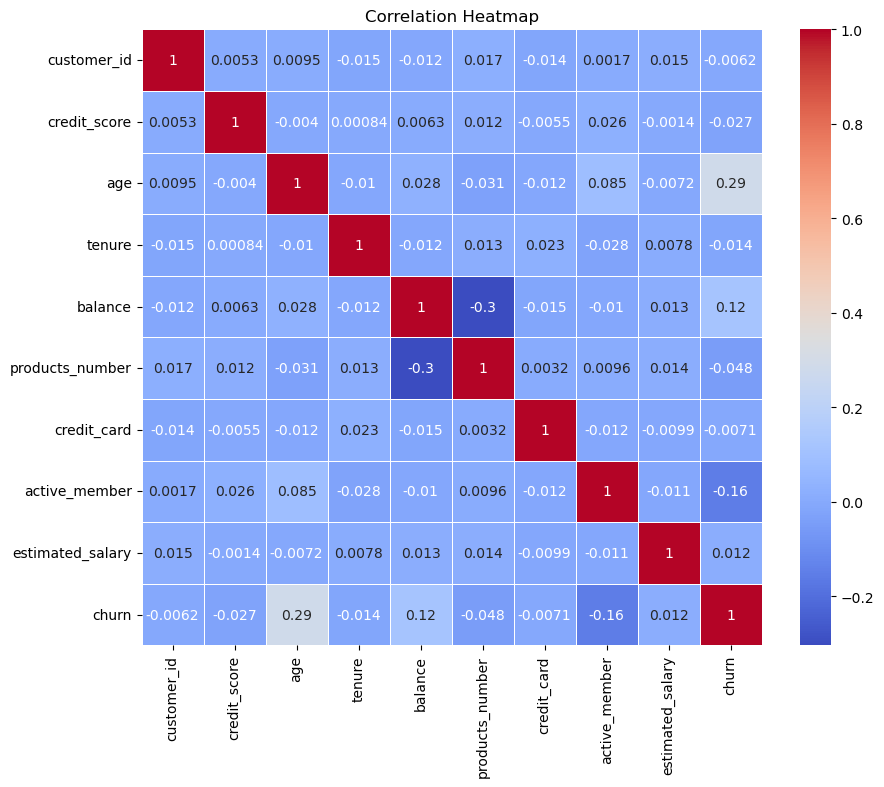

In [8]:
#Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# EDA

In [9]:
#Unique values in categorical features
print("Unique values in categorical columns:")
for col in ['country', 'gender']:
    print(f"{col}: {Data[col].unique()}")

Unique values in categorical columns:
country: ['France' 'Spain' 'Germany']
gender: ['Female' 'Male']


In [10]:
# Distribution of numerical features
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
print("Summary of Numerical Features:")
Data[numerical_features].describe()

Summary of Numerical Features:


,credit_score,age,tenure,balance,products_number,estimated_salary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [11]:
# Distribution of categorical features
categorical_features = ['country', 'gender', 'credit_card', 'active_member']
print("Summary of Categorical Features:")
for feature in categorical_features:
    print(f"\n{feature} value counts:\n", Data[feature].value_counts())

Summary of Categorical Features:

country value counts:
 France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

gender value counts:
 Male      5457
Female    4543
Name: gender, dtype: int64

credit_card value counts:
 1    7055
0    2945
Name: credit_card, dtype: int64

active_member value counts:
 1    5151
0    4849
Name: active_member, dtype: int64


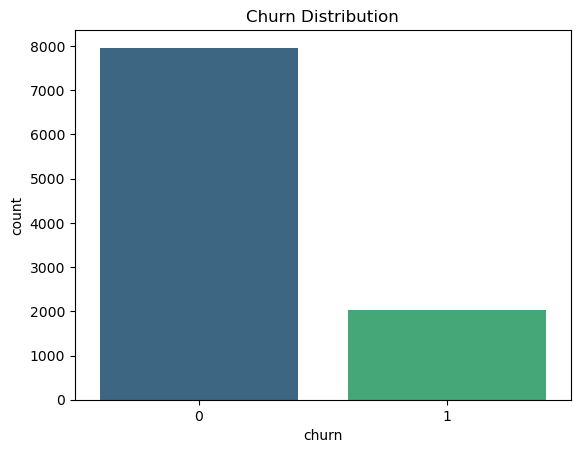

In [12]:
# Churn Distribution
sns.countplot(x='churn', data=Data, palette="viridis")
plt.title('Churn Distribution')
plt.show()

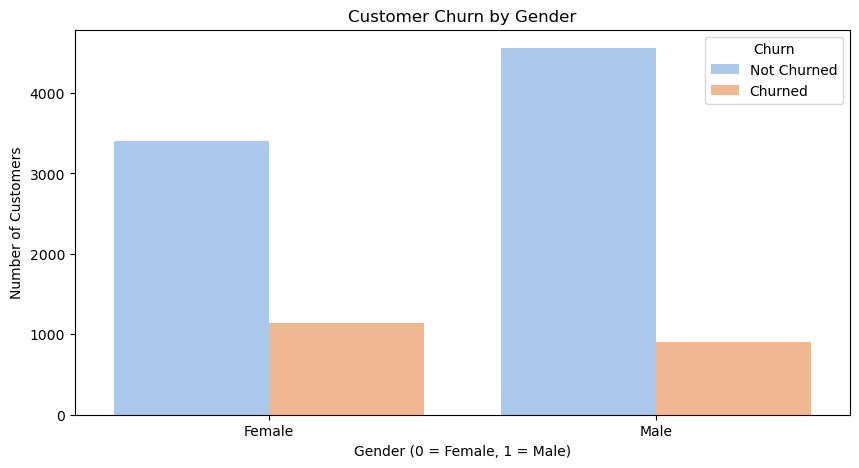

In [13]:
# Bar Chart for Churn by Gender
plt.figure(figsize=(10, 5))
sns.countplot(x='gender', hue='churn', data=Data, palette='pastel')
plt.title('Customer Churn by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

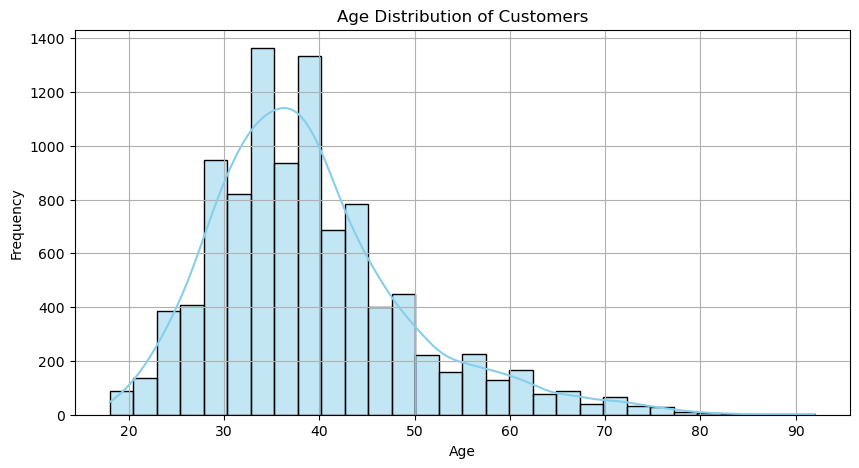

In [14]:
# Histogram for Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(Data['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

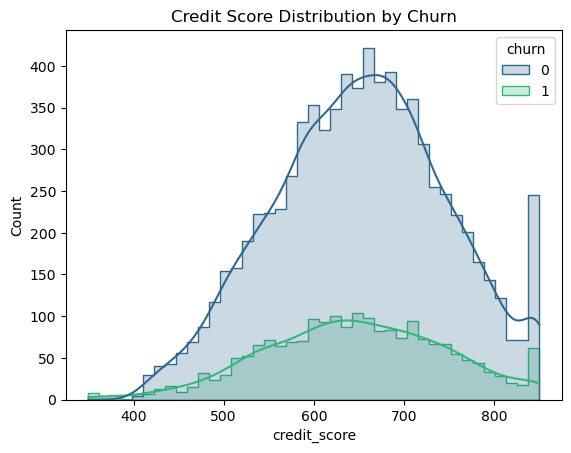

In [15]:
# credit_score vs Churn
sns.histplot(data=Data, x='credit_score', hue='churn', kde=True, palette="viridis", element="step")
plt.title('Credit Score Distribution by Churn')
plt.show()

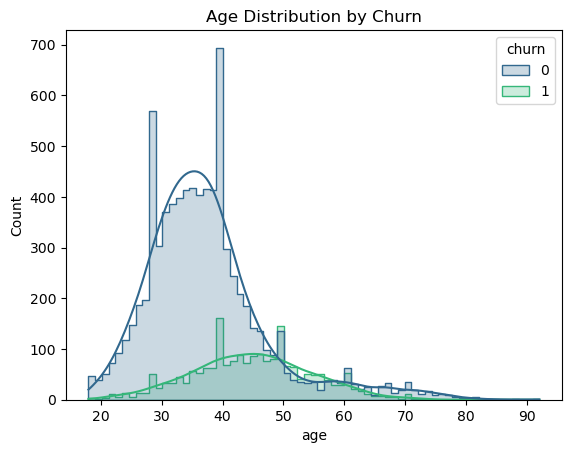

In [16]:
# Age vs Churn
sns.histplot(data=Data, x='age', hue='churn', kde=True, palette="viridis", element="step")
plt.title('Age Distribution by Churn')
plt.show()

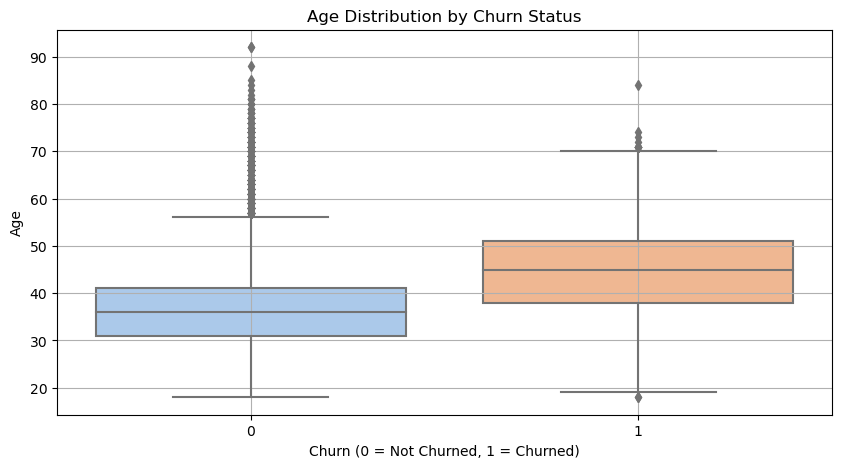

In [17]:
# Box Plot for Age vs. Churn
plt.figure(figsize=(10, 5))
sns.boxplot(x='churn', y='age', data=Data, palette='pastel')
plt.title('Age Distribution by Churn Status')
plt.xlabel('Churn (0 = Not Churned, 1 = Churned)')
plt.ylabel('Age')
plt.grid()
plt.show()

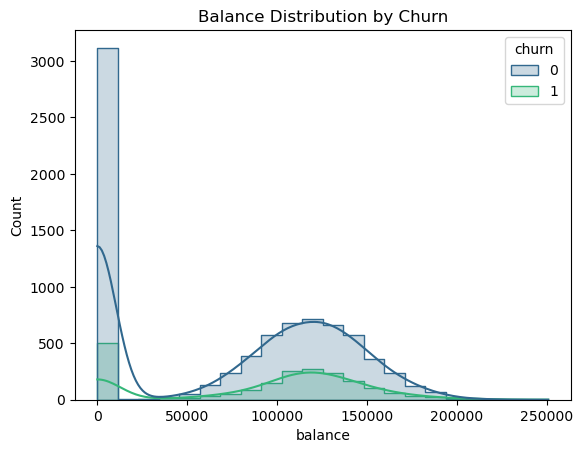

In [18]:
# Balance vs Churn
sns.histplot(data=Data, x='balance', hue='churn', kde=True, palette="viridis", element="step")
plt.title('Balance Distribution by Churn')
plt.show()

In [19]:
# Churn by Country
churn_by_country = Data.groupby('country')['churn'].mean()
print("\nChurn Rate by Country:\n", churn_by_country)


Churn Rate by Country:
 country
France     0.161548
Germany    0.324432
Spain      0.166734
Name: churn, dtype: float64


In [20]:
# Churn by Gender
churn_by_gender = Data.groupby('gender')['churn'].mean()
print("\nChurn Rate by Gender:\n", churn_by_gender)


Churn Rate by Gender:
 gender
Female    0.250715
Male      0.164559
Name: churn, dtype: float64


In [21]:
# Churn by Active Member
churn_by_active_member = Data.groupby('active_member')['churn'].mean()
print("\nChurn Rate by Active Member:\n", churn_by_active_member)


Churn Rate by Active Member:
 active_member
0    0.268509
1    0.142691
Name: churn, dtype: float64


In [22]:
# Analysis of Tenure by Churn
print("\nTenure by Churn:\n", Data.groupby('churn')['tenure'].mean())


Tenure by Churn:
 churn
0    5.033279
1    4.932744
Name: tenure, dtype: float64


In [23]:
# Churn by Number of Products
churn_by_products = Data.groupby('products_number')['churn'].mean()
print("\nChurn Rate by Number of Products:\n", churn_by_products)


Churn Rate by Number of Products:
 products_number
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: churn, dtype: float64


In [24]:
# Estimated Salary by Churn
print("\nEstimated Salary by Churn:\n", Data.groupby('churn')['estimated_salary'].mean())


Estimated Salary by Churn:
 churn
0     99738.391772
1    101465.677531
Name: estimated_salary, dtype: float64


In [25]:
# Conditional Statistics Based on Churn
print("Summary Statistics Grouped by Churn:")
churn_grouped_stats = Data.groupby('churn').mean()
print(churn_grouped_stats)

Summary Statistics Grouped by Churn:
        customer_id  credit_score        age    tenure       balance  \
churn                                                                  
0      1.569117e+07    651.853196  37.408389  5.033279  72745.296779   
1      1.569005e+07    645.351497  44.837997  4.932744  91108.539337   

       products_number  credit_card  active_member  estimated_salary  
churn                                                                 
0             1.544267     0.707146       0.554565      99738.391772  
1             1.475209     0.699067       0.360825     101465.677531  


# Data Preprocessing

In [26]:
# Encoding categorical features
label_encoder = LabelEncoder()

Data['country'] = label_encoder.fit_transform(Data['country'])
Data['gender'] = label_encoder.fit_transform(Data['gender'])


In [27]:
Data.drop(columns=['customer_id'], inplace=True)


In [28]:
Data.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

# Model Building and Training

In [29]:
# Splitting data into features (X) and target (y)
X = Data.drop('churn', axis=1)
y = Data['churn']


In [30]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Model 1: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)


In [33]:
# Model Evaluation
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Confusion Matrix:
 [[1559   48]
 [ 322   71]]


In [34]:
# Model 2: Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [35]:
# Model Evaluation
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix:
 [[1546   61]
 [ 210  183]]


# ROC Curve Comparison

In [36]:
# Logistic Regression ROC Curve
y_pred_proba_log = log_reg.predict_proba(X_test_scaled)[:,1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)

In [37]:
# Random Forest ROC Curve
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)


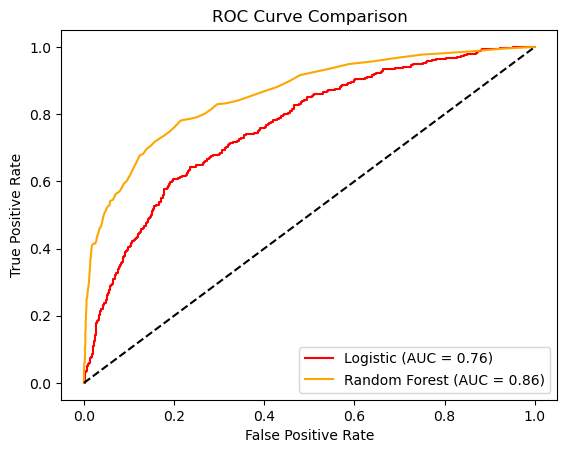

In [38]:
# Plotting ROC Curves
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC = {roc_auc_log:.2f})", color="red")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color="orange")
plt.plot([0, 1], [0, 1], 'k--')  # Black dashed line for reference
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [39]:
# Churn Prediction Function
def predict_churn(model, scaler, input_data):
    
    # Convert the input data to a numpy array
    input_data = np.array(input_data).reshape(1, -1)
    
    input_data_scaled = scaler.transform(input_data)
    
    prediction = model.predict(input_data_scaled)
    
    # Output
    if prediction == 1:
        return "The customer is likely to churn."
    else:
        return "The customer is unlikely to churn."



# Testing the Models with Sample Data

In [40]:
# Input values
input_data = [600, 1, 0, 40, 5, 60000, 2, 1, 1, 50000]  

#Random forest model
model_1 = log_reg

## model_1 Result
result = predict_churn(model_1, scaler, input_data)
print(result)

The customer is unlikely to churn.


In [41]:
#Logistic Regression
model_2 = rf_clf 

## model_2 Result
result = predict_churn(model_2, scaler, input_data)
print(result)

The customer is unlikely to churn.
